## Import Libraries

In [1]:
# Import the libraries we usually use for data analysis.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker

## The Data

**Column Descriptions:**    
* Tax Year: The year the customer filed their taxes (i.e. In 2015, they filed their 2014 (TY14) taxes).               
* Log-In Date: The date they first logged in to the product in that tax year.               
* Completed Product: Which product did they use to file their taxes.           
* Marketing Channel: Which marketing channel drove the log-in.  
* Customer Type: What customer segment is the customer in when they logged in.             
    * Veteran - Returning/Existing Customer.  
    * New - New Customer.     
* Log-In Flag: Flag indicating whether or not the customer logged in vs. just visited.             
    * This data includes only customer's who logged in.             
* Completed: Flag indicating whether or not the customer completed after logging in.        
* Session Count: # of times a customer logged in before completing.           
* Price: Average selling price per unit.         

**Note on Null:**
* Null values means there is data missing or not available. 

## Get the Data


In [2]:
# Read csv file
df = pd.read_csv('.../data.csv')

In [3]:
# Rename columns and data cleaning
df.rename(columns = {'Tax Year':'tax_year', 'Login Date':'login_date', 
                     'Completed_Product':'completed_product', 'Marketing_Channel':'marketing_channel',
                    'CUSTOMER_TYPE':'customer_type', 'Login_Flag':'login_flag',
                    'Completed':'completed', 'Session_Count':'session_count',
                    'Price':'price'}, inplace = True) 

df['price'] = df['price'].str.lstrip("$").replace('(null)', 0).fillna(0)
df['price'] = pd.to_numeric(df['price']) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
tax_year             2000 non-null object
login_date           2000 non-null object
completed_product    2000 non-null object
marketing_channel    2000 non-null object
customer_type        2000 non-null object
login_flag           2000 non-null int64
completed            2000 non-null int64
session_count        2000 non-null object
price                2000 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 140.7+ KB


In [5]:
df.head()

,tax_year,login_date,completed_product,marketing_channel,customer_type,login_flag,completed,session_count,price
0,TY13,12/31/2013,(null),Paid Search,(null),1,0,(null),0.00
1,TY13,12/31/2013,Premier,Organic Search,New,1,1,0,59.99
2,TY13,1/2/2014,Deluxe,Organic Search,New,1,1,0,39.99
3,TY13,1/2/2014,Free,Non-Campaign,New,1,1,0,0.00
4,TY13,1/4/2014,Premier,Non-Campaign,New,1,1,0,59.99


## Questions and Solutions

____
**Question 1: A new marketing manager joined the company and needs to be taught about our customer base. Prepare a quick summary that highlights some relevant features. One idea (among many) of the things that might be interesting to include: which customers and marketing channels are most valuable?**
____

**** Session Count Distribution ****

Text(0, 0.5, 'Count')

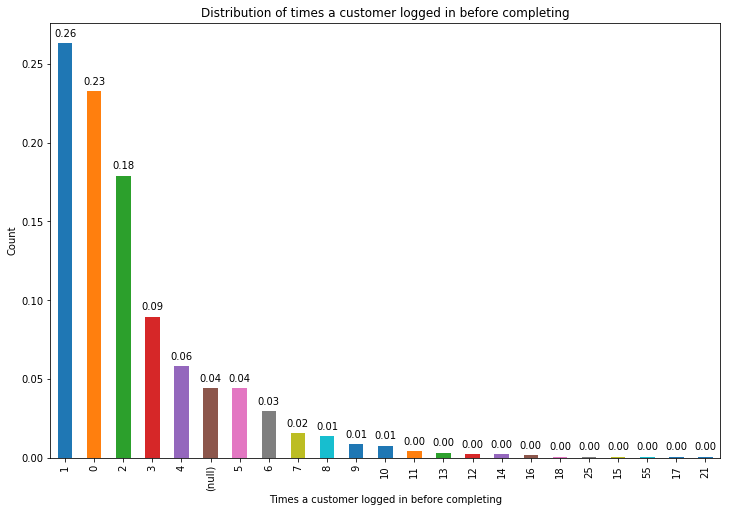

In [6]:
# Distribution of times a customer logged in before completing
plt.figure(figsize=(12, 8))
ax = df['session_count'].value_counts(normalize = True).plot.bar()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.title('Distribution of times a customer logged in before completing')
plt.xlabel('Times a customer logged in before completing')
plt.ylabel('Count')

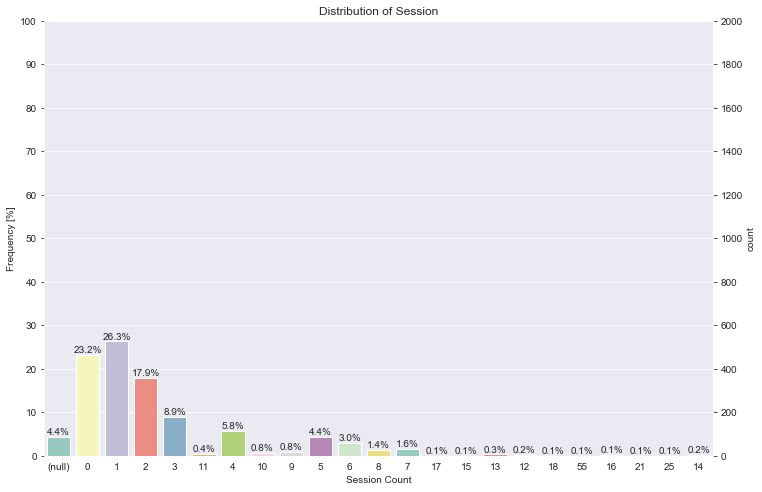

In [7]:
# Visualization Practice
ncount = len(df)

sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = 'session_count', data = df, palette = "Set3")
plt.title('Distribution of Session')
plt.xlabel('Session Count')

# Make twin axis
ax2 = ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

**** Distribution of customers' login month ****

In [8]:
# Split the login_month as a column
df['login_month'] = df['login_date'].str.split('/', 1, expand = True)[0]
df.head()

,tax_year,login_date,completed_product,marketing_channel,customer_type,login_flag,completed,session_count,price,login_month
0,TY13,12/31/2013,(null),Paid Search,(null),1,0,(null),0.00,12
1,TY13,12/31/2013,Premier,Organic Search,New,1,1,0,59.99,12
2,TY13,1/2/2014,Deluxe,Organic Search,New,1,1,0,39.99,1
3,TY13,1/2/2014,Free,Non-Campaign,New,1,1,0,0.00,1
4,TY13,1/4/2014,Premier,Non-Campaign,New,1,1,0,59.99,1


In [9]:
df10 = df[df['completed_product'] == 'Free']

Text(0, 0.5, 'Count')

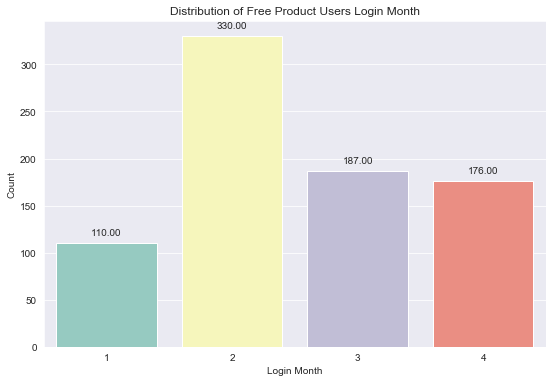

In [10]:
# Plot distribution of customers' login month
sns.set_style("darkgrid")
plt.figure(figsize=(9, 6))
ax = sns.countplot(x = 'login_month', data = df10, palette = "Set3")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.title('Distribution of Free Product Users Login Month')
plt.xlabel('Login Month')
plt.ylabel('Count')

**** Distribution of Revenue by Month ****

In [11]:
# Calculate Revenue by moNTH
df0 = df.groupby('login_month', as_index = False)['price'].sum()
df0 = df0.sort_values(['price'], ascending = False).reset_index(drop = True)
df0

,login_month,price
0,2,14036.37
1,3,11397.76
2,4,10937.98
3,1,3439.21
4,12,59.99


Text(0, 0.5, 'Value')

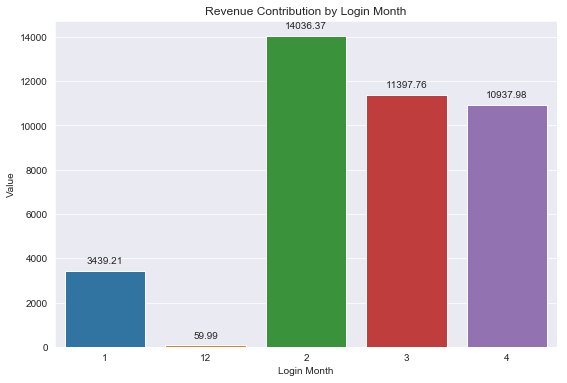

In [12]:
# Barplot of Revenue by Login Month
sns.set_style("darkgrid")
plt.figure(figsize=(9, 6))

ax = sns.barplot(x = 'login_month', y = 'price', data = df0)
                 #, palette = "Set3")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Revenue Contribution by Login Month')
plt.xlabel('Login Month')
plt.ylabel('Value')

**** Revenue Contribution by Customer Type ****

In [13]:
# Drop column 'login_month'
df.drop('login_month', inplace = True, axis = 1)

In [14]:
# Revenue Contribution by Customer Type
# Calculate revenue generated from different Customer Type
df1 = df.groupby('customer_type', as_index = False)['price'].sum()
df1 = df1[df1['customer_type'] != '(null)']
df1

,customer_type,price
1,New,1739.52
2,Veteran,38131.79


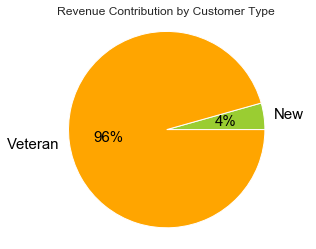

In [15]:
# Pie Chart: Revenue Contribution by Customer Type
plt.rcParams['figure.figsize'] = [5, 4]
colors = ['yellowgreen','orange']

plt.pie(df1['price'], labels = df1['customer_type'], autopct = '%.0f%%', 
        textprops = {'fontsize':15, 'color':'k'}, colors = colors)

plt.axis('equal')

plt.title('Revenue Contribution by Customer Type')
plt.show()

**** Revenue Contribution by Marketing Channel ****

In [16]:
# Revenue Contribution by Marketing Channel
# Calculate revenue generated from multiple channels
df2 = df.groupby('marketing_channel', as_index = False)['price'].sum()
df2 = df2.sort_values(['price'], ascending = False).reset_index(drop = True)
df2

,marketing_channel,price
0,Non-Campaign,11457.61
1,Paid Search,9337.98
2,Organic Search,7938.14
3,DR,7218.42
4,FI Channel,2379.47
5,Affiliate,839.81
6,Display,599.89
7,Other,99.99
8,Internal,0.00


In [50]:
df2['price']/df2['price'].sum()

0    0.287365
1    0.234203
2    0.199094
3    0.181043
4    0.059679
5    0.021063
6    0.015046
7    0.002508
8    0.000000
Name: price, dtype: float64

Text(0, 0.5, 'Value')

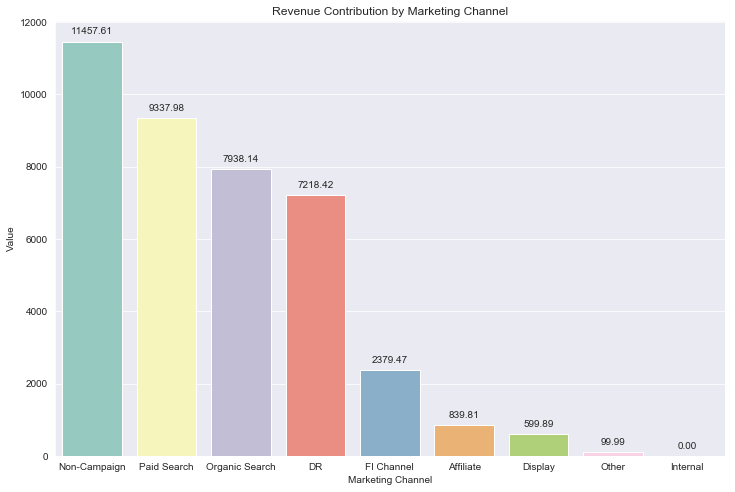

In [17]:
# Barplot of revenue Contribution by Marketing Channel
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

ax = sns.barplot(x = 'marketing_channel', y = 'price', data = df2
                 , palette = "Set3")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Revenue Contribution by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Value')

**** Revenue Contribution by Product ****

In [18]:
# Revenue contribution by product
df5 = df.groupby('completed_product', as_index = False)['price'].sum()
df5 = df5.sort_values(['price'], ascending = False).reset_index(drop = True)
df5

,completed_product,price
0,Deluxe,22253.60
1,H & B,9699.03
2,Premier,7918.68
3,(null),0.00
4,Free,0.00


In [51]:
df5['price']/df5['price'].sum()

0    0.558136
1    0.243258
2    0.198606
3    0.000000
4    0.000000
Name: price, dtype: float64

Text(0, 0.5, 'Value')

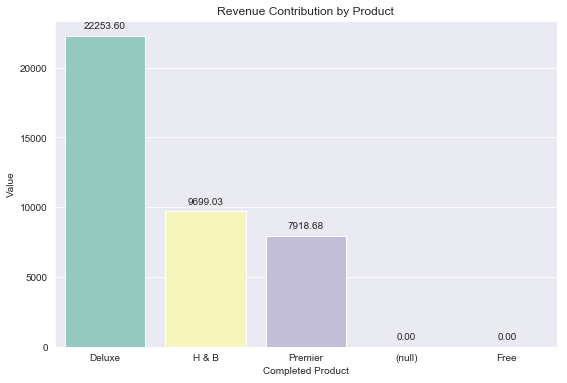

In [19]:
# Barplot of revenue Contribution by product
sns.set_style("darkgrid")
plt.figure(figsize=(9, 6))

ax = sns.barplot(x = 'completed_product', y = 'price', data = df5, palette = "Set3")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Revenue Contribution by Product')
plt.xlabel('Completed Product')
plt.ylabel('Value')

**** Distribution of Completed Deals after Login ****

In [20]:
# Number and Percentage of completed/incomplete deals
df['completed'].value_counts()

1    1672
0     328
Name: completed, dtype: int64

In [21]:
df['completed'].value_counts(normalize = True)

1    0.836
0    0.164
Name: completed, dtype: float64

In [22]:
# Number and Percentage of completed/incomplete deals by marketing channel
df['marketing_channel'].value_counts()

Non-Campaign      575
Paid Search       504
Organic Search    405
DR                305
FI Channel         90
Affiliate          80
Display            31
Other               8
Internal            2
Name: marketing_channel, dtype: int64

In [23]:
# Number and percentage of completed deals by marketing channel
df.groupby('marketing_channel')['completed'].value_counts()

marketing_channel  completed
Affiliate          1             63
                   0             17
DR                 1            256
                   0             49
Display            1             26
                   0              5
FI Channel         1             87
                   0              3
Internal           0              1
                   1              1
Non-Campaign       1            452
                   0            123
Organic Search     1            343
                   0             62
Other              1              5
                   0              3
Paid Search        1            439
                   0             65
Name: completed, dtype: int64

In [24]:
df.groupby('marketing_channel')['completed'].value_counts(normalize = True)

marketing_channel  completed
Affiliate          1            0.787500
                   0            0.212500
DR                 1            0.839344
                   0            0.160656
Display            1            0.838710
                   0            0.161290
FI Channel         1            0.966667
                   0            0.033333
Internal           0            0.500000
                   1            0.500000
Non-Campaign       1            0.786087
                   0            0.213913
Organic Search     1            0.846914
                   0            0.153086
Other              1            0.625000
                   0            0.375000
Paid Search        1            0.871032
                   0            0.128968
Name: completed, dtype: float64

In [25]:
# Among all 1672 completed deals, Number and Percentage of completed deals by product
df3 = df[df['completed'] != 0]
df3['completed_product'].value_counts()

Free       803
Deluxe     640
Premier    132
H & B       97
Name: completed_product, dtype: int64

In [26]:
df3['completed_product'].value_counts(normalize = True)

Free       0.480263
Deluxe     0.382775
Premier    0.078947
H & B      0.058014
Name: completed_product, dtype: float64

In [27]:
# Among all 1672 completed deals, Number and Percentage of completed deals by customer_type
df3['customer_type'].value_counts(normalize = True)

Veteran    0.925239
New        0.074761
Name: customer_type, dtype: float64

____
**Question 2: We ran a discount promotion on one product in early 2015. Can you describe the promotion and make a recommendation as to whether it was successful? Should we run a similar promotion next year?**
____

In [28]:
# Identify the product that was in 2015 discount promotion
df9 = df[df['completed_product'] != '(null)'][['tax_year', 'completed_product', 'price']].drop_duplicates().sort_values([
    'tax_year', 'completed_product'], ascending = True).reset_index(drop = True)
df9

# It's Deluxe. Regular price is $39.99, and promotion price is $ 19.99.

,tax_year,completed_product,price
0,TY13,Deluxe,39.99
1,TY13,Free,0.00
2,TY13,H & B,99.99
3,TY13,Premier,59.99
4,TY14,Deluxe,39.99
5,TY14,Deluxe,19.99
6,TY14,Free,0.00
7,TY14,H & B,99.99
8,TY14,Premier,59.99


In [29]:
df[df['completed_product'] != '(null)'].groupby(['tax_year', 
                                        'completed_product', 'price'])['completed'].count().reset_index()

,tax_year,completed_product,price,completed
0,TY13,Deluxe,39.99,276
1,TY13,Free,0.00,374
2,TY13,H & B,99.99,55
3,TY13,Premier,59.99,60
4,TY14,Deluxe,19.99,167
5,TY14,Deluxe,39.99,197
6,TY14,Free,0.00,429
7,TY14,H & B,99.99,42
8,TY14,Premier,59.99,72


In [30]:
167/(93 + 167 + 197 + 429 + 42 + 72)

0.167

In [31]:
# Calculate total revenue from Deluxe in TY13 and TY14 to measure
df[df['completed_product'] == 'Deluxe'].groupby(['tax_year', 'completed_product'], as_index = False)['price'].sum()

,tax_year,completed_product,price
0,TY13,Deluxe,11037.24
1,TY14,Deluxe,11216.36


In [32]:
# Calculate total revenue for TY13 and TY14
df[df['completed_product'] != '(null)'].groupby(['tax_year'], as_index = False)['price'].sum()

# 39871.31 in total

,tax_year,price
0,TY13,20136.09
1,TY14,19735.22


In [33]:
# Sales volume for TY13 and TY14 per product  
df[df['completed_product'] != '(null)'].groupby(['tax_year', 'completed_product'], 
                                                as_index = False)['completed'].count()

,tax_year,completed_product,completed
0,TY13,Deluxe,276
1,TY13,Free,374
2,TY13,H & B,55
3,TY13,Premier,60
4,TY14,Deluxe,364
5,TY14,Free,429
6,TY14,H & B,42
7,TY14,Premier,72


In [34]:
# Sales volume for TY13 and TY14 
df[df['completed_product'] != '(null)'].groupby(['tax_year'], 
                                                as_index = False)['completed_product'].count()

,tax_year,completed_product
0,TY13,765
1,TY14,907


In [35]:
12/60

0.2

In [36]:
# Sales volume for TY13 and TY14 per marketing channel and product   -- can edit product name
df[(df['completed_product'] != '(null)') & (df['completed_product'] == 'Deluxe')].groupby(['tax_year', 
                   'completed_product', 'marketing_channel'], as_index = False)['completed'].count()

,tax_year,completed_product,marketing_channel,completed
0,TY13,Deluxe,Affiliate,7
1,TY13,Deluxe,DR,54
2,TY13,Deluxe,Display,6
3,TY13,Deluxe,FI Channel,6
4,TY13,Deluxe,Non-Campaign,71
5,TY13,Deluxe,Organic Search,58
6,TY13,Deluxe,Paid Search,74
7,TY14,Deluxe,Affiliate,7
8,TY14,Deluxe,DR,57
9,TY14,Deluxe,Display,2


*Suggestions:*

- Revenue: Total revenue -400.87 (-2.00%). Revenue from H&B drops from 5499.99 to 4199.58 (-1300.41, -2.37%) while Revenue from Deluxe increases from 11037.24 to 11216.36 (+ 178.12, +1.61%), premier increase from 3599.40 to 4319.28 (+719.88, 2.00%).
___
- Sales Volume: Total volume +142. H&B net -13 (Non-campaign -8, Paid-Search -12), Deluxe net +88(FI Channel +23, Non-campaign +29, Organic Search +33), Free +55, Premier +12.
___
- Not conclusive to say whether it's successful given the current information. From the revenue side, revenue from Deluxe increase 1.61% while the total year revenue decrease 2.00%, however, the number of total users increase 19%, among them, # of Deluxe users increase 32% while # of H&B decrease 24%.
- We sacrifice some revenue to increase market share. If total revenue is the goal, false; if Deluxe revenue is the goal, win. If market share of total or Deluxe are the goal, win. 
___
- Depends on the objective of this year. BUT, need to know costs of promotion to calculate the profit.


____
**Question 3: The company wants to grow the free product next year. Make a recommendation as to which marketing channel(s) we should invest in. Should we focus on a particular time of year?**
____

In [37]:
df2

,marketing_channel,price
0,Non-Campaign,11457.61
1,Paid Search,9337.98
2,Organic Search,7938.14
3,DR,7218.42
4,FI Channel,2379.47
5,Affiliate,839.81
6,Display,599.89
7,Other,99.99
8,Internal,0.00


Text(0, 0.5, 'Value')

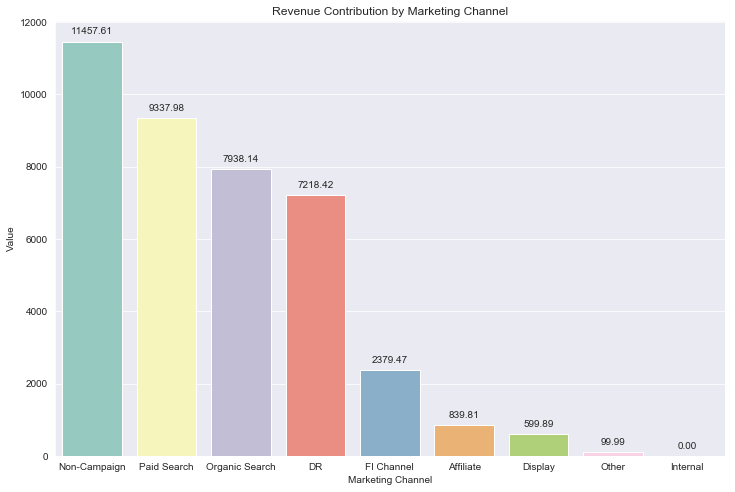

In [38]:
# Revenue Per Channel
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

ax = sns.barplot(x = 'marketing_channel', y = 'price', data = df2
                 , palette = "Set3")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Revenue Contribution by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Value')

In [39]:
# Completed Number Per Channel
df.groupby('marketing_channel')['completed'].count()

marketing_channel
Affiliate          80
DR                305
Display            31
FI Channel         90
Internal            2
Non-Campaign      575
Organic Search    405
Other               8
Paid Search       504
Name: completed, dtype: int64

In [40]:
# Completed Rate Per Channel
df.groupby('marketing_channel')['completed'].value_counts(normalize = True)

marketing_channel  completed
Affiliate          1            0.787500
                   0            0.212500
DR                 1            0.839344
                   0            0.160656
Display            1            0.838710
                   0            0.161290
FI Channel         1            0.966667
                   0            0.033333
Internal           0            0.500000
                   1            0.500000
Non-Campaign       1            0.786087
                   0            0.213913
Organic Search     1            0.846914
                   0            0.153086
Other              1            0.625000
                   0            0.375000
Paid Search        1            0.871032
                   0            0.128968
Name: completed, dtype: float64

In [41]:
# Login numbers Per Channel
df.groupby('marketing_channel', as_index = False)['login_flag'].sum().sort_values([
    'login_flag'], ascending = False).reset_index(drop = True)

,marketing_channel,login_flag
0,Non-Campaign,575
1,Paid Search,504
2,Organic Search,405
3,DR,305
4,FI Channel,90
5,Affiliate,80
6,Display,31
7,Other,8
8,Internal,2


In [42]:
# Login per marketing channel per product  -- can edit product
df[df['completed_product'] == 'Free'].groupby(['marketing_channel', 'completed_product'],
    as_index = False)['login_flag'].sum().sort_values(['login_flag'], ascending = False).reset_index(drop = True)

,marketing_channel,completed_product,login_flag
0,Paid Search,Free,237
1,Non-Campaign,Free,213
2,Organic Search,Free,157
3,DR,Free,98
4,Affiliate,Free,44
5,FI Channel,Free,34
6,Display,Free,15
7,Other,Free,4
8,Internal,Free,1


In [43]:
# Revenue per channel -- can edit product
df7 = df.groupby(['marketing_channel'],as_index = False)['price'].sum().sort_values(['price']
                                        , ascending = False).reset_index(drop = True)
df7['pct'] = df7['price']/df7['price'].sum()
df7

,marketing_channel,price,pct
0,Non-Campaign,11457.61,0.287365
1,Paid Search,9337.98,0.234203
2,Organic Search,7938.14,0.199094
3,DR,7218.42,0.181043
4,FI Channel,2379.47,0.059679
5,Affiliate,839.81,0.021063
6,Display,599.89,0.015046
7,Other,99.99,0.002508
8,Internal,0.00,0.000000


In [44]:
# Revenue per marketing channel per product  -- can edit product
df[df['marketing_channel'] == 'DR'].groupby(['marketing_channel', 'completed_product'],
    as_index = False)['login_flag'].sum().sort_values(['login_flag'], ascending = False).reset_index(drop = True)

,marketing_channel,completed_product,login_flag
0,DR,Deluxe,111
1,DR,Free,98
2,DR,(null),49
3,DR,Premier,34
4,DR,H & B,13


*Suggeations:*

- Choose Affiliate, Display, Other, Internal to do FREE product marketing event, as 88% people log in from other channels, if we can attract more people from these channels with free product then probobaly paid-product, the sales volume and sales amount will be expected to greatly increase.
___
- Among all exisiting channels, affliate, non-campaign, have relatively high pct non-complete, can dive in.
___

**Question 4: Open-ended: Explore the data, and surprise us with a recommendation**

In [45]:
df.head()

,tax_year,login_date,completed_product,marketing_channel,customer_type,login_flag,completed,session_count,price
0,TY13,12/31/2013,(null),Paid Search,(null),1,0,(null),0.00
1,TY13,12/31/2013,Premier,Organic Search,New,1,1,0,59.99
2,TY13,1/2/2014,Deluxe,Organic Search,New,1,1,0,39.99
3,TY13,1/2/2014,Free,Non-Campaign,New,1,1,0,0.00
4,TY13,1/4/2014,Premier,Non-Campaign,New,1,1,0,59.99


In [46]:
df['marketing_channel'].unique()

array(['Paid Search', 'Organic Search', 'Non-Campaign', 'FI Channel',
       'Affiliate', 'DR', 'Display', 'Internal', 'Other'], dtype=object)

In [47]:
# Distribution of times a customer logged in before completing
df[df['marketing_channel'] == 'Affiliate']['session_count'].value_counts()

0         29
1         14
(null)    12
2         10
3          5
5          3
7          2
8          2
4          2
13         1
Name: session_count, dtype: int64

In [48]:
# Distribution product from each channel
# df[df['marketing_channel'] == 'Affiliate']['completed_product'].value_counts()

In [49]:
# Distribution Revenue from each channel
# df[df['marketing_channel'] == 'Affiliate'].groupby('completed_product', as_index = False)['price'].sum()

____
**Question 5: What other datapoints would you like to have in order to better evaluate these questions? Make a recommendation as to the critical datapoints we should collect in addition to what’s in this dataset.**
____

- Main objective of campaign or promotion, engagement or revenue?

- Additional info for login flag: need dp for those who visit but not login.

- Costs of each products, and Costs of campaign or other promotion events, to calculate profits.
- More historical data to better figure out seasonality.

- Individual level data to identify the feature of each user groups, to understand the market potential, and to do customer targrting and pricing.
- Activities during their 2nd, 3rd, etc. visits.